# Phase I: Data Acquisition, Data Preparation & Exploratory Data Analysis

## Data Aquisition

In [1]:
#import pandas library
import pandas as pd

I'll choose 'edible_or_poisonous','cap-shape', 'cap-surface', 'odor' from the mushroom dataset and add the relative column names

In [2]:
header_list = ['edible_or_poisonous','cap-shape', 'cap-surface', 'odor']
# usecols are the 0th, 1th, 2th and 5th according to the Attribute Information
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header = None, usecols=[0,1,2,5], names = header_list)
df.head()

,edible_or_poisonous,cap-shape,cap-surface,odor
0,p,x,s,p
1,e,x,s,a
2,e,b,s,l
3,p,x,y,p
4,e,x,s,n


## Data Preparation

In [3]:
# convert the edible_or_poisonous value into digit, 'e' is 0, 'p' is 1
df['edible_or_poisonous'].replace(['e','p'], [0,1], inplace=True)
df.head()

,edible_or_poisonous,cap-shape,cap-surface,odor
0,1,x,s,p
1,0,x,s,a
2,0,b,s,l
3,1,x,y,p
4,0,x,s,n


In order to be easily predicted in sklearn, I'll change all categorical features into Dummy numeric data.

In [4]:
df_dummy = pd.get_dummies(df, prefix=['cap-shape', 'cap-surface', 'odor'])
df_dummy.head()

,edible_or_poisonous,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y
0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


## Exploratory Data Analysis

In [5]:
# check data if includes null value
df.isnull().sum()

edible_or_poisonous    0
cap-shape              0
cap-surface            0
odor                   0
dtype: int64

In [6]:
# check original data type and shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   edible_or_poisonous  8124 non-null   int64 
 1   cap-shape            8124 non-null   object
 2   cap-surface          8124 non-null   object
 3   odor                 8124 non-null   object
dtypes: int64(1), object(3)
memory usage: 254.0+ KB


In [7]:
# show data description
df.describe()

,edible_or_poisonous
count,8124.000000
mean,0.482029
std,0.499708
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


There are 8124 rows among these data set. And it showed descriptive stats for edible_or_poisonous variables. The mean is 0.482 which is greater than median value of 0. It means that the values are skewed to the right. So I will check the count of edible and poisonous mushroom data.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns 

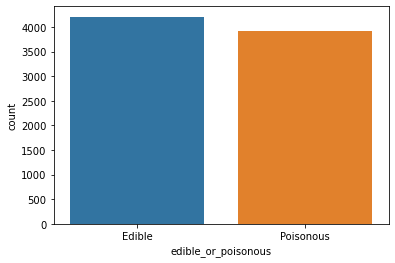

In [9]:
class_dict = {'Edible':0, 'Poisonous':1}
p_edi_poi = sns.countplot(x = 'edible_or_poisonous',data = df)
p_edi_poi.set(xticklabels=class_dict)
p_edi_poi

As we can see, the counts of Edible and Poisonous mushroom are different but the samples are not far apart.

Next, I will look at the remaining features vs the 'edible_or_poisonous' with plot. Before then, I will first define the xtick lables for each feture values in dicts as below.

In [10]:
shape_dict = {"bell":"b","conical":"c","convex":"x","flat":"f", "knobbed":"k","sunken":"s"}
surface_dict = {"smooth":"s", "scaly":"y", "fibrous":"f","grooves":"g"}
odor_dict = {"almond":"a","anise":"l","creosote":"c","fishy":"y",
             "foul":"f","musty":"m","none":"n","pungent":"p","spicy":"s"}

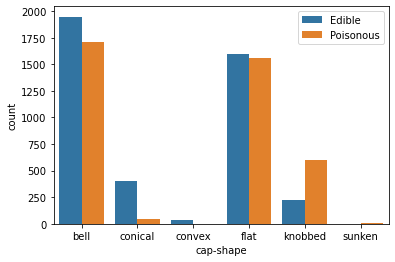

In [11]:
p_shape = sns.countplot(x = 'cap-shape',data = df, hue = "edible_or_poisonous")
p_shape.set(xticklabels=shape_dict)
p_shape.legend(labels=class_dict)
p_shape

'Shape' can also be a good indicator, as "conical" and "convex" shapes look more likely to be edible.

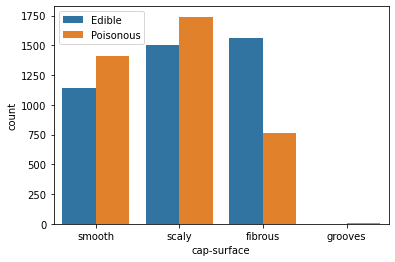

In [12]:
p_surface = sns.countplot(x = 'cap-surface',data = df, hue = "edible_or_poisonous")
p_surface.set(xticklabels=surface_dict)
p_surface.legend(labels=class_dict)
p_surface

But in terms of 'surface' features, the data is balanced, which means it's not a good indicator.

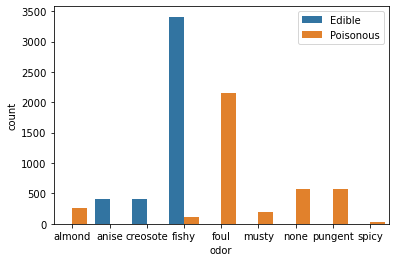

In [13]:
p_odor = sns.countplot(x = 'odor',data = df, hue = "edible_or_poisonous")
p_odor.set(xticklabels=odor_dict)
p_odor.legend(labels=class_dict)
p_odor

The "ordor" feature may be a better indicator of whether mushrooms are edible or poisonous because the data are clearly unbalanced.

After then, I will see the correlation between all columns in dummy dataset roughly.

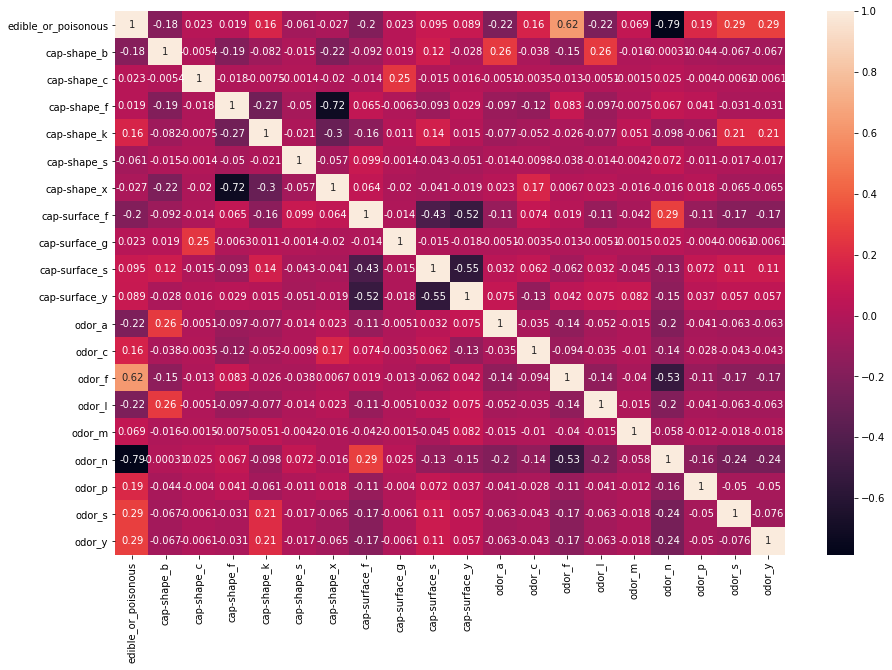

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df_dummy.corr(),annot=True)

According to heatmap, Ordor_f and Ordor_n are likely to be high indicators, as their correlation scores exceed 0.5.
In order to understand the ranking of all indicators related to the target in the virtual data, I will divide and fit the data to obtain the characteristic ranking as shown below.

In [15]:
from sklearn.model_selection import train_test_split

train_data = df_dummy.drop(columns = ["edible_or_poisonous"])
train_target = df_dummy['edible_or_poisonous']

#The data is divided into training set and test set
X_train,X_test,Y_train,Y_test = train_test_split(train_data,train_target,test_size = 0.3,random_state = 1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(5686, 19)
(5686,)
(2438, 19)
(2438,)


In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(train_data,train_target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train_data.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['element','Score']  #naming the dataframe columns
featureScores = featureScores.sort_values(by='Score', ascending=False) # set the order from high to low
featureScores

,element,Score
15,odor_n,2836.187954
12,odor_f,2321.062308
18,odor_y,618.949949
17,odor_s,618.949949
10,odor_a,372.243346
13,odor_l,372.243346
16,odor_p,275.088866
0,cap-shape_b,255.712333
6,cap-surface_f,221.636970
11,odor_c,206.316650


plot the correlation ranking score by featureScores dataframe.

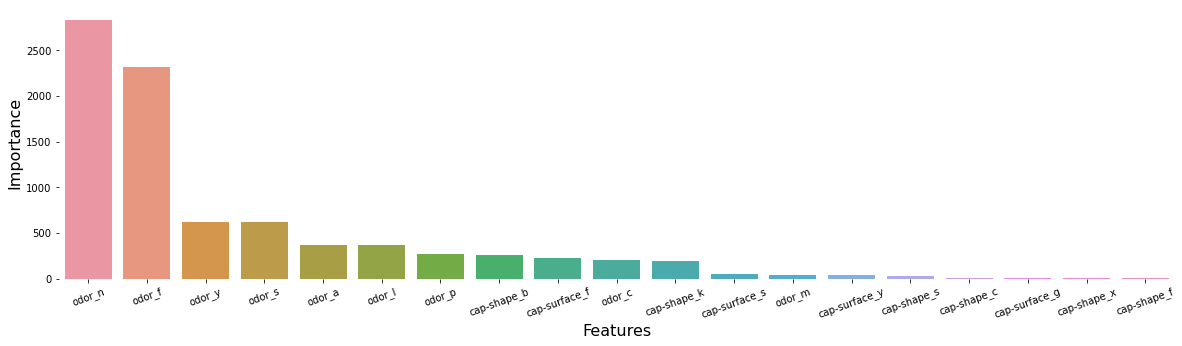

In [17]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=20)
sns.barplot(x='element', y='Score', data= featureScores)
plt.box(False)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Importance',fontsize=16)
plt.show()

# Phase II: Build Predictive Models

In this section, I will prepare the data by spliting it to training and testing data.
Then I will build a logistic model to predict which features is most helpful to predict whether mushrooms are edible or poisonous, since it is a question of "yes" or "no".

In [18]:
# check the df_dummy dataset data type and shape
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   edible_or_poisonous  8124 non-null   int64
 1   cap-shape_b          8124 non-null   uint8
 2   cap-shape_c          8124 non-null   uint8
 3   cap-shape_f          8124 non-null   uint8
 4   cap-shape_k          8124 non-null   uint8
 5   cap-shape_s          8124 non-null   uint8
 6   cap-shape_x          8124 non-null   uint8
 7   cap-surface_f        8124 non-null   uint8
 8   cap-surface_g        8124 non-null   uint8
 9   cap-surface_s        8124 non-null   uint8
 10  cap-surface_y        8124 non-null   uint8
 11  odor_a               8124 non-null   uint8
 12  odor_c               8124 non-null   uint8
 13  odor_f               8124 non-null   uint8
 14  odor_l               8124 non-null   uint8
 15  odor_m               8124 non-null   uint8
 16  odor_n               812

## predictor detemine

Import the train_test_split function from the Sklearn library and split the target and training data in each feature.

In [19]:
from sklearn.model_selection import train_test_split
train_target = df_dummy['edible_or_poisonous']

### Shape

In [20]:
# [;,1:7] means select the "shape" feature dummy data
Shape_train_data = df_dummy.iloc[:, 1:7]

#The data is divided into training set and test set
Shape_X_train,Shape_X_test,Shape_Y_train,Shape_Y_test = train_test_split(Shape_train_data,train_target,test_size = 0.3,random_state = 1)
print(Shape_X_train.shape)
print(Shape_Y_train.shape)
print(Shape_X_test.shape)
print(Shape_Y_test.shape)

(5686, 6)
(5686,)
(2438, 6)
(2438,)


#### Binary Logistic Regression Model

Building the Logistic regression model to fit training data and predict the test data

In [21]:
# use Logistic Regression Model

from sklearn.linear_model import LogisticRegression
Shape_LR = LogisticRegression(max_iter=2600)
Shape_LR.fit(Shape_X_train,Shape_Y_train)
Shape_LR_predictTest= Shape_LR.predict(Shape_X_test)

#### Analyze model performance metrics (AUC, ROC, Confusion Matrix)

After building the model, I will test my model by looking at the Confusion Matrix, AUC, and ROC scores

True Positives:167
False Positives:59
True Negatives:1177
False Negatives:1035


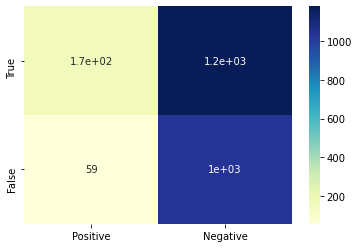

In [22]:
from sklearn.metrics import confusion_matrix
# If the mushroom actually is poisonous and the prediction confirms it, it's called TP
# If the mushroom actually is edible and the prediction confirms it is edible, it is called TN
# If the mushroom actually is edible but the prediction confirms it is poisonous, it is called FP
# If the mushroom actually is poisonous but the prediction confirms it is edible, it's called FN

tn, fp, fn, tp = confusion_matrix(Shape_Y_test, Shape_LR_predictTest).ravel()
print('True Positives:' + str(tp))
print('False Positives:' + str(fp))
print('True Negatives:' + str(tn))
print('False Negatives:'+ str(fn))
matrix = [[tp, tn], [fp, fn]]
df_confusion_matrix = pd.DataFrame(matrix, index=["True", "False"], columns=["Positive", "Negative"])
sns.heatmap(df_confusion_matrix,annot=True,cmap="YlGnBu")

#### Optimize the Confusion Matrix

In [23]:
# accuracy statistics
from sklearn import metrics
from sklearn.metrics import classification_report

In [24]:
print('Accuracy Score:', metrics.accuracy_score(Shape_Y_test, Shape_LR_predictTest))
# create classification report
class_report=classification_report(Shape_Y_test, Shape_LR_predictTest)
print(class_report)

Accuracy Score: 0.5512715340442986
              precision    recall  f1-score   support

           0       0.53      0.95      0.68      1236
           1       0.74      0.14      0.23      1202

    accuracy                           0.55      2438
   macro avg       0.64      0.55      0.46      2438
weighted avg       0.63      0.55      0.46      2438



By looking at the accuracy acore which is only 0.55, which is near a random score, is not a good result. In addition, the recall of negative predict has a higher score which is 0.95 means it might be a good indicator to predict the mushroom is edible but not sure if it's poisonous. In result, it's not a suitable indicator.

In [25]:
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Shape_Y_test))]
# predict probabilities
lr_probs = Shape_LR.predict_proba(Shape_X_test)[:,1]
# calculate scores
ns_auc = roc_auc_score(Shape_Y_test, ns_probs)
lr_auc = roc_auc_score(Shape_Y_test, lr_probs)

In [26]:
# calculate scores
lr_auc = roc_auc_score(Shape_Y_test, lr_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.597


After calculating the ROC and AUC score which is close to the random value, it demonstrated the inference above. And I will plot the FPR and TPR gragh to look at it clearly.

In [27]:
from sklearn.metrics import roc_curve

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Shape_Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Shape_Y_test, lr_probs)

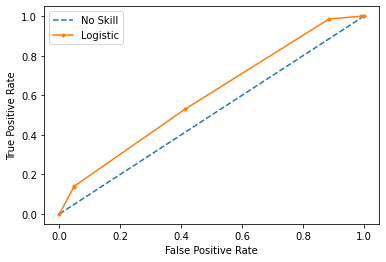

In [28]:
from matplotlib import pyplot
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Surface

In [29]:
# [;,7:11] means select the "surface" feature dummy data
Surface_train_data = df_dummy.iloc[:, 7:11]

#The data is divided into training set and test set
Surface_X_train,Surface_X_test,Surface_Y_train,Surface_Y_test = train_test_split(Surface_train_data,train_target,test_size = 0.3,random_state = 1)
print(Surface_X_train.shape)
print(Surface_Y_train.shape)
print(Surface_X_test.shape)
print(Surface_Y_test.shape)

(5686, 4)
(5686,)
(2438, 4)
(2438,)


Do the same model as same as the above.

#### Binary Logistic Regression Model

In [30]:
Surface_LR = LogisticRegression(max_iter=2600)
Surface_LR.fit(Surface_X_train,Surface_Y_train)
Surface_LR_predictTest= Surface_LR.predict(Surface_X_test)

#### Analyze model performance metrics (AUC, ROC, Confusion Matrix)

True Positives:964
False Positives:780
True Negatives:456
False Negatives:238


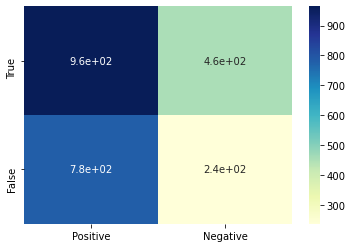

In [31]:
# If the mushroom actually is poisonous and the prediction confirms it, it's called TP
# If the mushroom actually is edible and the prediction confirms it is edible, it is called TN
# If the mushroom actually is edible but the prediction confirms it is poisonous, it is called FP
# If the mushroom actually is poisonous but the prediction confirms it is edible, it's called FN

tn, fp, fn, tp = confusion_matrix(Surface_Y_test, Surface_LR_predictTest).ravel()
print('True Positives:' + str(tp))
print('False Positives:' + str(fp))
print('True Negatives:' + str(tn))
print('False Negatives:'+ str(fn))
matrix = [[tp, tn], [fp, fn]]
df_confusion_matrix = pd.DataFrame(matrix, index=["True", "False"], columns=["Positive", "Negative"])
sns.heatmap(df_confusion_matrix,annot=True,cmap="YlGnBu")

#### Optimize the Confusion Matrix

In [32]:
print('Accuracy Score:', metrics.accuracy_score(Surface_Y_test, Surface_LR_predictTest))
# create classification report
class_report=classification_report(Surface_Y_test, Surface_LR_predictTest)
print(class_report)

Accuracy Score: 0.5824446267432322
              precision    recall  f1-score   support

           0       0.66      0.37      0.47      1236
           1       0.55      0.80      0.65      1202

    accuracy                           0.58      2438
   macro avg       0.60      0.59      0.56      2438
weighted avg       0.61      0.58      0.56      2438



Since the accuracy score is 0.58 and f1-score is also low. The feature of 'surface' is not a good indicator for predicting.

In [33]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Surface_Y_test))]
# predict probabilities
lr_probs = Surface_LR.predict_proba(Surface_X_test)[:,1]
# calculate scores
ns_auc = roc_auc_score(Surface_Y_test, ns_probs)
lr_auc = roc_auc_score(Surface_Y_test, lr_probs)

In [34]:

# calculate scores
lr_auc = roc_auc_score(Surface_Y_test, lr_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.593


Therefore, the output ROC and AUC are relatively low.

In [35]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Surface_Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Surface_Y_test, lr_probs)

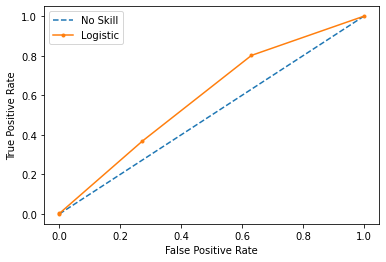

In [36]:
from matplotlib import pyplot
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## ordor

In [37]:
# [;,11:20] means select the "ordor" feature dummy data
Ordor_train_data = df_dummy.iloc[:, 11:20]

#The data is divided into training set and test set
Ordor_X_train,Ordor_X_test,Ordor_Y_train,Ordor_Y_test = train_test_split(Ordor_train_data,train_target,test_size = 0.3,random_state = 1)
print(Ordor_X_train.shape)
print(Ordor_Y_train.shape)
print(Ordor_X_test.shape)
print(Ordor_Y_test.shape)

(5686, 9)
(5686,)
(2438, 9)
(2438,)


#### Binary Logistic Regression Model

In [38]:
Ordor_LR = LogisticRegression(max_iter=2600)
Ordor_LR.fit(Ordor_X_train,Ordor_Y_train)
Ordor_LR_predictTest= Ordor_LR.predict(Ordor_X_test)

#### Analyze model performance metrics (AUC, ROC, Confusion Matrix)

True Positives:1157
False Positives:0
True Negatives:1236
False Negatives:45


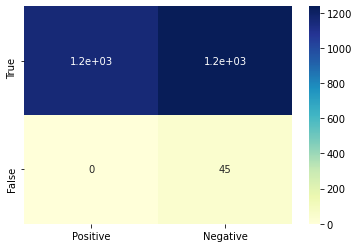

In [39]:
# If the mushroom actually is poisonous and the prediction confirms it, it's called TP
# If the mushroom actually is edible and the prediction confirms it is edible, it is called TN
# If the mushroom actually is edible but the prediction confirms it is poisonous, it is called FP
# If the mushroom actually is poisonous but the prediction confirms it is edible, it's called FN

tn, fp, fn, tp = confusion_matrix(Ordor_Y_test, Ordor_LR_predictTest).ravel()
print('True Positives:' + str(tp))
print('False Positives:' + str(fp))
print('True Negatives:' + str(tn))
print('False Negatives:'+ str(fn))
matrix = [[tp, tn], [fp, fn]]
df_confusion_matrix = pd.DataFrame(matrix, index=["True", "False"], columns=["Positive", "Negative"])
sns.heatmap(df_confusion_matrix,annot=True,cmap="YlGnBu")

#### Optimize the Confusion Matrix

In [40]:
print('Accuracy Score:', metrics.accuracy_score(Ordor_Y_test, Ordor_LR_predictTest))
# create classification report
class_report=classification_report(Ordor_Y_test, Ordor_LR_predictTest)
print(class_report)

Accuracy Score: 0.9815422477440525
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1236
           1       1.00      0.96      0.98      1202

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



The feature of 'ordor' is the best indicator since the precision, recall and f1-score are all higher more than 95%, which means the prediction and actual result are almost matched.

In [41]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Ordor_Y_test))]
# predict probabilities
lr_probs = Ordor_LR.predict_proba(Ordor_X_test)[:,1]
# calculate scores
ns_auc = roc_auc_score(Ordor_Y_test, ns_probs)
lr_auc = roc_auc_score(Ordor_Y_test, lr_probs)

In [42]:
# calculate scores
lr_auc = roc_auc_score(Ordor_Y_test, lr_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.985


The ROC and AUC score are pretty high, ehich also demonstrated it is the best indicator.

In [43]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Ordor_Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Ordor_Y_test, lr_probs)

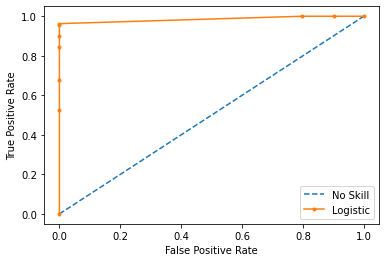

In [44]:
from matplotlib import pyplot
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

The ploting area is almost in 90 degree, which is close to 100% match to the prediction.

# In conclusion

The "ordor" feature is the best feature for making further predictions about whether mushrooms are poisonous and for building models from the mushroom data set.
As the confusion matrix can directly display the prediction results, and the model can be tested by relative accuracy, accuracy, F1, AUC and RUC scores, the logistic model is also a good prediction model. 
In addition, using the Sklearn library to create dummy datasets can make the training process easier and more accurate.